# Logistic Regression - Can it beat the baseline model?

In [49]:
# import data

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/cleaned_data.csv')
df.head()
#standr scaling for lg reg

,state,slug,launched_at_weekday,launched_at_month,duration_days,goal_in_usd,north_america
0,1,10,2,12,45,200.0,1
1,1,0,2,2,20,400.0,1
2,1,11,1,11,30,27224.0,1
3,1,5,5,10,41,45461.0,0
4,0,13,0,3,30,1000.0,1


In [50]:
# Defining target and predictors 
X = df[['slug', 'launched_at_weekday', 'launched_at_month', 'duration_days', 'goal_in_usd', 'north_america']]
y = df['state']

# Train-test-split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Baseline Model

In [51]:
# Modelling
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

Accuracy:  0.6262696535411159
              precision    recall  f1-score   support

           0       0.64      0.23      0.34     20910
           1       0.62      0.90      0.74     29399

    accuracy                           0.63     50309
   macro avg       0.63      0.57      0.54     50309
weighted avg       0.63      0.63      0.57     50309



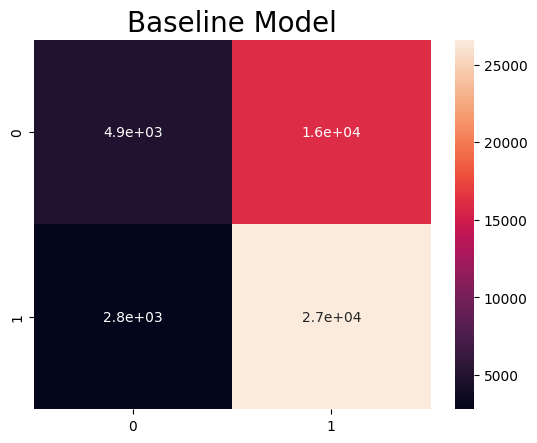

In [52]:
# Confusion matrix baseline
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Baseline Model", fontsize =20)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Data Scaling with Standardization

In [53]:
# Scaling with standard scaler

# Define columns that should be scaled
col_scale = ['slug', 'launched_at_weekday', 'launched_at_month', 'north_america']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[col_scale])
X_test_scaled = scaler.transform(X_test[col_scale])

# Concatenating scaled and dummy columns 
X_train_preprocessed = np.concatenate([X_train_scaled, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed = np.concatenate([X_test_scaled, X_test.drop(col_scale, axis=1)], axis=1)

In [54]:
# Modelling scaled data
logistic_regression_scaled = LogisticRegression()
logistic_regression_scaled.fit(X_train_preprocessed, y_train)
y_pred_scaled = logistic_regression_scaled.predict(X_test_preprocessed)

Accuracy:  0.6286946669581983
              precision    recall  f1-score   support

           0       0.66      0.22      0.33     20910
           1       0.62      0.92      0.74     29399

    accuracy                           0.63     50309
   macro avg       0.64      0.57      0.54     50309
weighted avg       0.64      0.63      0.57     50309



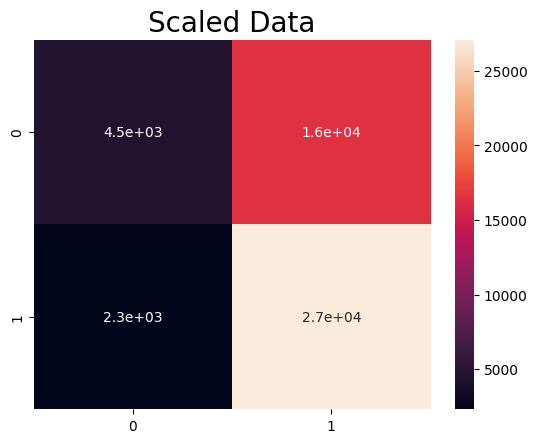

In [56]:
# Confusion matrix for scaled data
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
sns.heatmap(conf_matrix_scaled, annot=True)
plt.title("Scaled Data", fontsize =20)

print('Accuracy: ', accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

## Data scaled and Gridsearched for Maximum Wow

In [57]:
#what parameters does Logistic Regression have?
logistic_regression_scaled.get_params().keys()

#precision



dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])